<a href="https://colab.research.google.com/github/KIM-CHAEYOUNG/Visualization/blob/master/%5BSTUDY%5Dcategorical_plot(sns).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn으로 수치형/범주형 변수 **표현**

### 참고
- [seaborn](hhttps://seaborn.pydata.org/tutorial.html#)
- [오늘의 코드](https://www.youtube.com/watch?v=cooQq10Vm_s)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
tips=sns.load_dataset("tips")

In [6]:
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


# **Categorical scatterplots**
- stripplot(with kind="strip";the default)
- swarmplot(with kind='swarm')

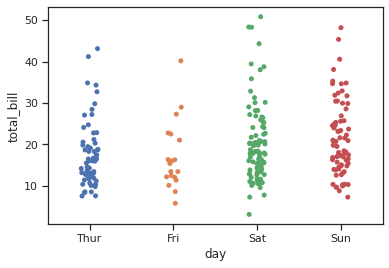

In [5]:
sns.stripplot(data=tips, x='day', y='total_bill')

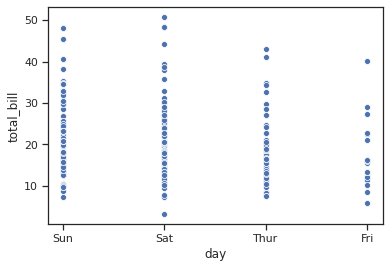

In [7]:
sns.scatterplot(data=tips, x='day', y='total_bill')

- scatterplot을 쓰면 값이 한쪽에 얼마나 몰려있는지 확인하기 어렵다
- 범주형 데이터에는 적합하지 않다

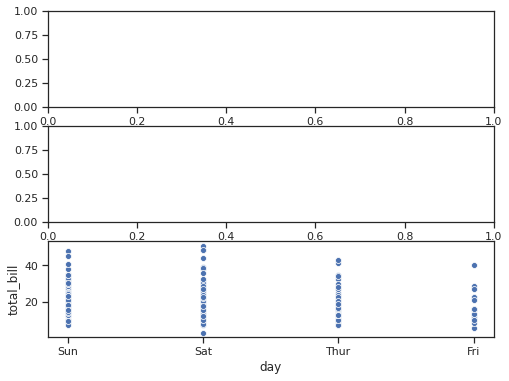

In [13]:
plt.subplots(nrows=3, ncols=1, figsize=(8,6))
sns.scatterplot(data=tips, x='day', y='total_bill')

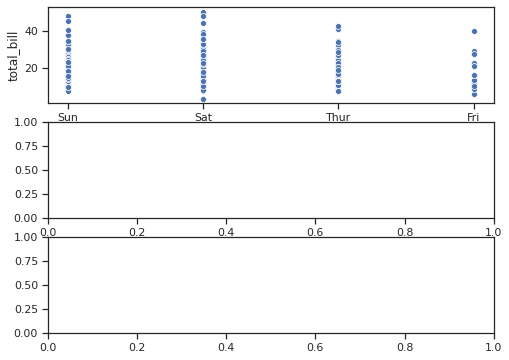

In [15]:
fig, axes=fig,axes=plt.subplots(nrows=3, ncols=1, figsize=(8,6))
sns.scatterplot(data=tips, x="day", y="total_bill", ax=axes[0])

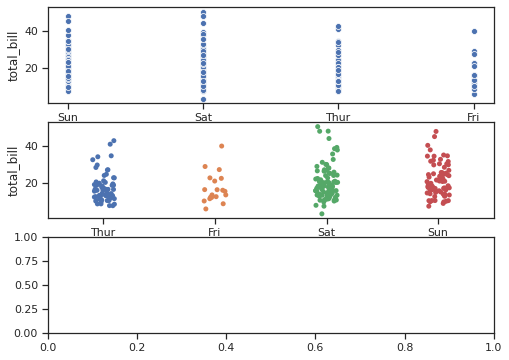

In [16]:
fig, axes=fig,axes=plt.subplots(nrows=3, ncols=1, figsize=(8,6))
sns.scatterplot(data=tips, x="day", y="total_bill", ax=axes[0])
sns.stripplot(data=tips, x="day", y="total_bill", ax=axes[1])

- stripplot을 그리면 값이 흩어지게 된다.

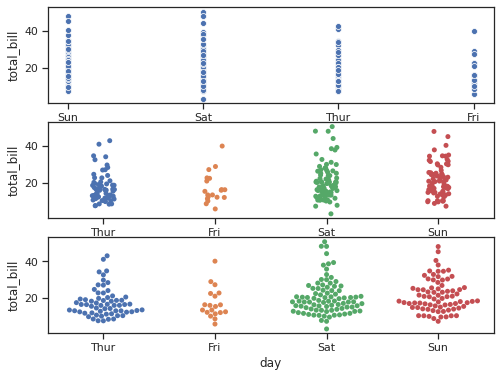

In [17]:
fig, axes=fig,axes=plt.subplots(nrows=3, ncols=1, figsize=(8,6))
sns.scatterplot(data=tips, x="day", y="total_bill", ax=axes[0])
sns.stripplot(data=tips, x="day", y="total_bill", ax=axes[1])
sns.swarmplot(data=tips, x="day", y="total_bill", ax=axes[2])

#**Categorical distribution plots**

- boxplot(with kind='box')
- violinplot(with kind='violin')
-bxenplot(with kind='boxen')

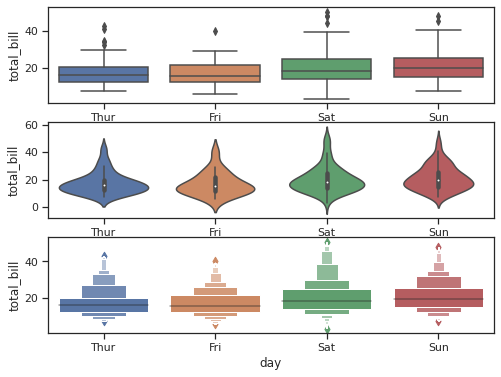

In [18]:
fig, axes=fig,axes=plt.subplots(nrows=3, ncols=1, figsize=(8,6))
sns.boxplot(data=tips, x="day", y="total_bill", ax=axes[0])
sns.violinplot(data=tips, x="day", y="total_bill", ax=axes[1])
sns.boxenplot(data=tips, x="day", y="total_bill", ax=axes[2])

- boxplot은 4분위수 표현
- 점값들은 이상치 // 
- 값의 분포 표현
- 단점) 1/4분위수 값이 바뀌는 것에 대한 분포 변화 확인 불가능-> 그래서 violinplot/boxen 사용
- 한 축의 값이 수치형 다른 한 축이 범주형일 경우에 box/violin/boxen 사용

#**Categorical estimate plots**

- pointplot() (with kind="point")

- barplot() (with kind="bar")

- countplot() (with kind="count")

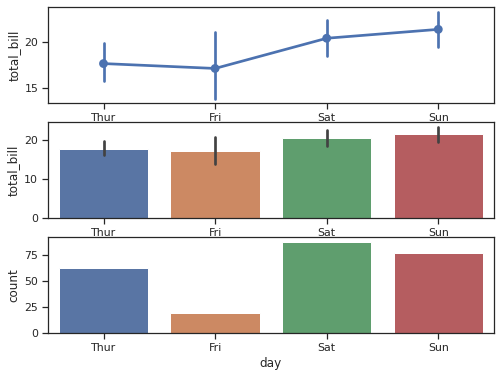

In [22]:
fig, axes=fig,axes=plt.subplots(nrows=3, ncols=1, figsize=(8,6))
sns.pointplot(data=tips, x="day", y="total_bill", ax=axes[0])
sns.barplot(data=tips, x="day", y="total_bill", ax=axes[1])
sns.countplot(data=tips, x="day", ax=axes[2])

# counterplot은 한 축의 값이 정해지면 다른 값들의 빈도수가 더해지 다른 한 축을 구성함
# barplot과 countplot은 평균값

- countplot은 catplot으로 그릴 수 있다

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


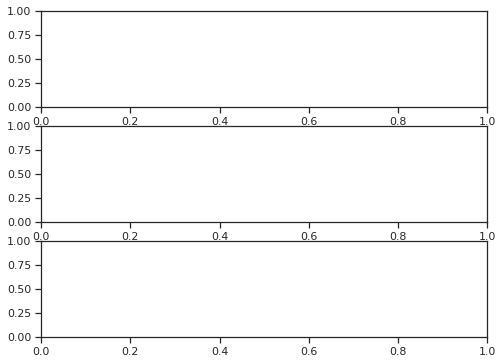

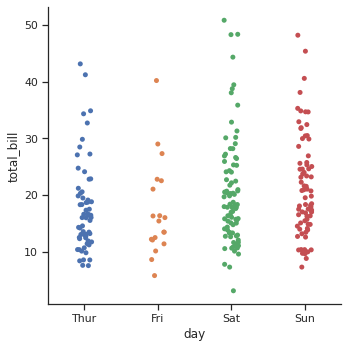

In [23]:
fig, axes=fig,axes=plt.subplots(nrows=3, ncols=1, figsize=(8,6))
sns.catplot(data=tips, x="day", y="total_bill", ax=axes[0])

- catplot은 taget axes에 그릴 수 없다(왜냐하면 catplot 자체가 서브 플롯)
- catplot은 axes 옵션을 제공하지 않음
- catplot은 stripplot과 유사, 메인플롯으로 쓰고 싶다면 stripplot을 쓰면 된다

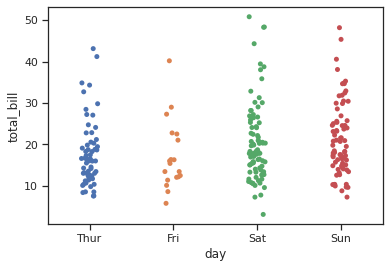

In [24]:
sns.stripplot(data=tips, x="day", y="total_bill")

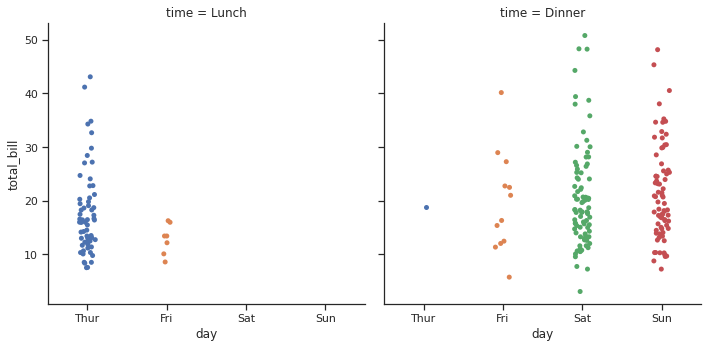

In [25]:
sns.catplot(data=tips, x="day", y="total_bill", col="time")

- catplot으로 서브플롯을 나누어 그래프를 그릴 수 있다

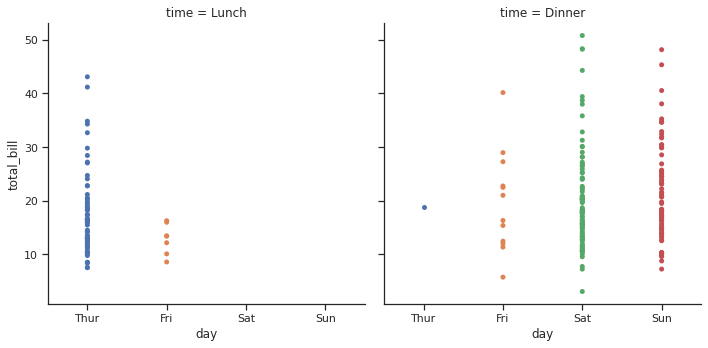

In [26]:
sns.catplot(data=tips, x="day", y="total_bill", col="time", jitter=False)

- jitter값을 설정했을 때 그래프가 위와 같이 그려진다면 데이터가 수치형이 아닌 범주형에 더 가깝다는 의미

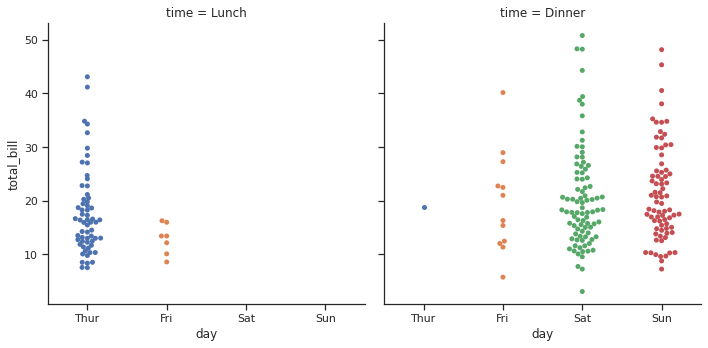

In [29]:
sns.catplot(data=tips, x='day', y='total_bill', col='time', kind='swarm')

- swarmplot으로 요일별 분포 확인 가능
- 범주형 데이터 분포도 확인
    + stripplot 
    + swarmplot

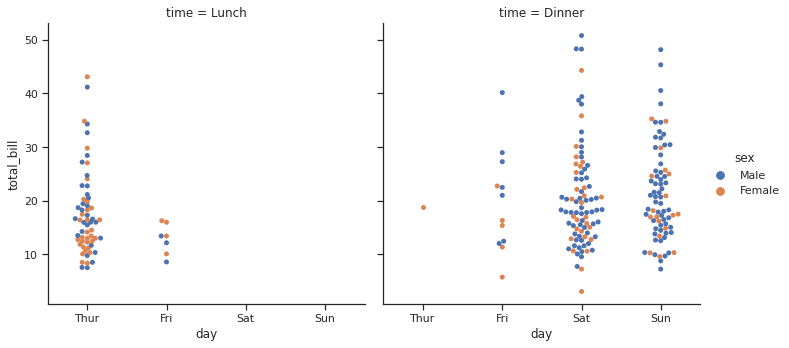

In [30]:
#hue option
sns.catplot(data=tips, x='day', y='total_bill', col='time', kind='swarm', hue='sex')

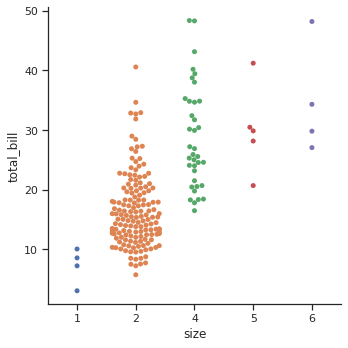

In [31]:
#pandas query 기능, 특정값만 가져다 시각화
sns.catplot(x='size', y='total_bill', kind='swarm', data=tips.query('size!=3'))

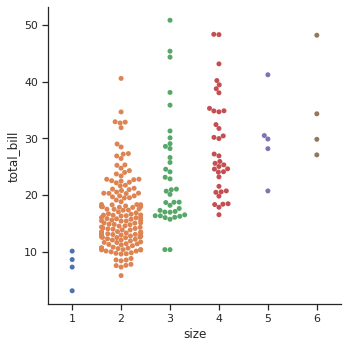

In [32]:
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips)

- query문으로 size값이 3인 아이들을 제외함

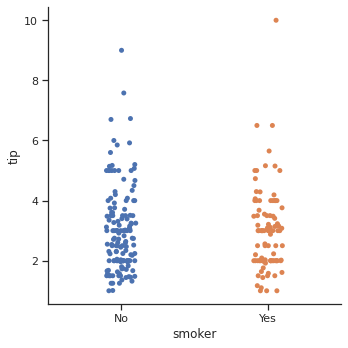

In [33]:
# order로 x축값 순서 배열 가능
sns.catplot(x='smoker', y='tip', order=['No', 'Yes'], data=tips)

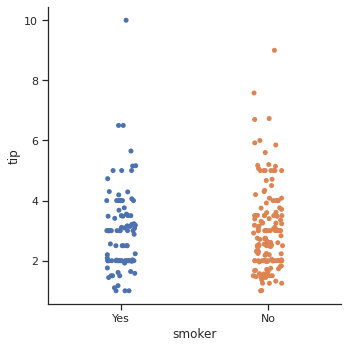

In [34]:
sns.catplot(x='smoker', y='tip', order=['Yes', 'No'], data=tips)

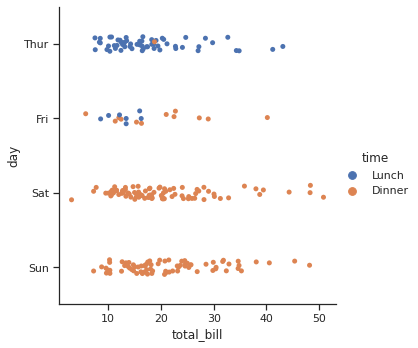

In [36]:
# x,y축 순서 변경
sns.catplot(x='total_bill', y='day', hue='time', data=tips)

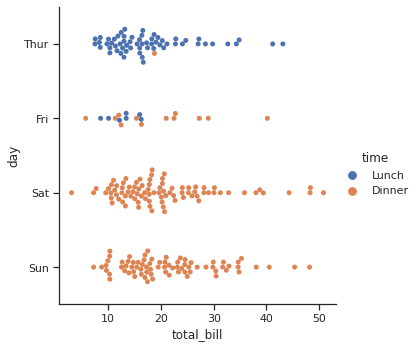

In [37]:
# x,y축 순서 변경
sns.catplot(x='total_bill', y='day', hue='time', kind='swarm', data=tips)